In [8]:
%matplotlib inline
import sys
sys.path.append("..")

In [9]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.tablogger import TabLogger

In [48]:
# load the file from the experiments directories

df = pd.DataFrame({})
for model in ("full", "minimal"):
    for batch_size in (1, 2, 4, 8, 16, 32, 64, 128, 256):    
        fpath = os.path.join(
            "..",
            "experiments",
            "profile-{}-vgg19_bn".format(model),
            "out",
            "{}_batchsize_{}.out".format(model,batch_size)
        )
        tlog = TabLogger(fpath, resume=True)
        tlog.close()

        # add the model column to the data dictionary
        dd = tlog.numbers
        dd["Model"] = ["VGG19_bn-" + model] * len(list(dd.values())[0])
        # convert all times from us (microseconds) to ms (milliseconds)
        dd["Self CPU Time"] = [t/1000 for t in dd["Self CPU Time"]]
        dd["CPU Time Total"] = [t/1000 for t in dd["CPU Time Total"]]
        dd["CUDA Time Total"] = [t/1000 for t in dd["CUDA Time Total"]]
        # convert batch size to integer
        dd["Batch Size"] = [int(t) for t in dd["Batch Size"]]

        # concat the dataframe
        df = pd.concat([df, pd.DataFrame(dd)])

In [49]:
print(df)

    Batch Size  Self CPU Time  CPU Time Total  CUDA Time Total  \
0            1      25.307330       96.819430              0.0   
1            1      19.651107       74.940380              0.0   
2            1      19.982992       76.030198              0.0   
3            1      18.202660       69.058785              0.0   
4            1      18.561267       70.643599              0.0   
..         ...            ...             ...              ...   
34         256      10.603339       38.762287              0.0   
35         256      11.169460       40.836421              0.0   
36         256      11.046308       40.381736              0.0   
37         256      10.698790       38.964552              0.0   
38         256       8.805159       32.251344              0.0   

               Model  
0      VGG19_bn-full  
1      VGG19_bn-full  
2      VGG19_bn-full  
3      VGG19_bn-full  
4      VGG19_bn-full  
..               ...  
34  VGG19_bn-minimal  
35  VGG19_bn-minimal  


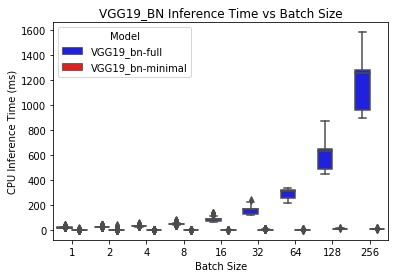

In [50]:
# plot in Seaborn
g = sns.boxplot(x="Batch Size", y="Self CPU Time", hue="Model", palette=["b", "r"], data=df)
# g.set_yscale("log")
g.set(ylabel="CPU Inference Time (ms)", title="VGG19_BN Inference Time vs Batch Size")
plt.savefig("profile_plot.png", dpi=200)
plt.show()